In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [6]:
(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.mnist.load_data() #mnist dataset
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [7]:
X_train, X_test = X_train.reshape(-1, 28,28,1), X_test.reshape(-1, 28,28,1)

In [14]:
model = tf.keras.Sequential([
	tf.keras.Input(shape=(28, 28, 1)),
	tf.keras.layers.Conv2D(filters=16, kernel_size=(5, 5), activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
	tf.keras.layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu'),
	tf.keras.layers.MaxPool2D(pool_size=(2, 2)),

	tf.keras.layers.Flatten(),
	tf.keras.layers.Dense(units=64, activation='relu'),
	tf.keras.layers.Dense(units=10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 8, 8, 32)          12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

In [17]:
X_train, X_test = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255, X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')/255



>Sgd




In [21]:
model.compile(
	optimizer = tf.keras.optimizers.SGD(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split = 0.4)

Epoch 1/20
1125/1125 [==============================] - 21s 18ms/step - loss: 0.6698 - accuracy: 0.8007 - val_loss: 0.2176 - val_accuracy: 0.9361
Epoch 2/20
1125/1125 [==============================] - 20s 18ms/step - loss: 0.1650 - accuracy: 0.9505 - val_loss: 0.1501 - val_accuracy: 0.9553
Epoch 3/20
1125/1125 [==============================] - 20s 18ms/step - loss: 0.1140 - accuracy: 0.9658 - val_loss: 0.1180 - val_accuracy: 0.9647
Epoch 4/20
1125/1125 [==============================] - 20s 18ms/step - loss: 0.0916 - accuracy: 0.9724 - val_loss: 0.0898 - val_accuracy: 0.9720
Epoch 5/20
1125/1125 [==============================] - 20s 18ms/step - loss: 0.0776 - accuracy: 0.9758 - val_loss: 0.0902 - val_accuracy: 0.9716
Epoch 6/20
1125/1125 [==============================] - 20s 18ms/step - loss: 0.0683 - accuracy: 0.9798 - val_loss: 0.0823 - val_accuracy: 0.9750
Epoch 7/20
1125/1125 [==============================] - 21s 18ms/step - loss: 0.0608 - accuracy: 0.9815 - val_loss: 0.0771 -

In [22]:
# training
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0412 - accuracy: 0.9867

Test accuracy: 0.9866999983787537


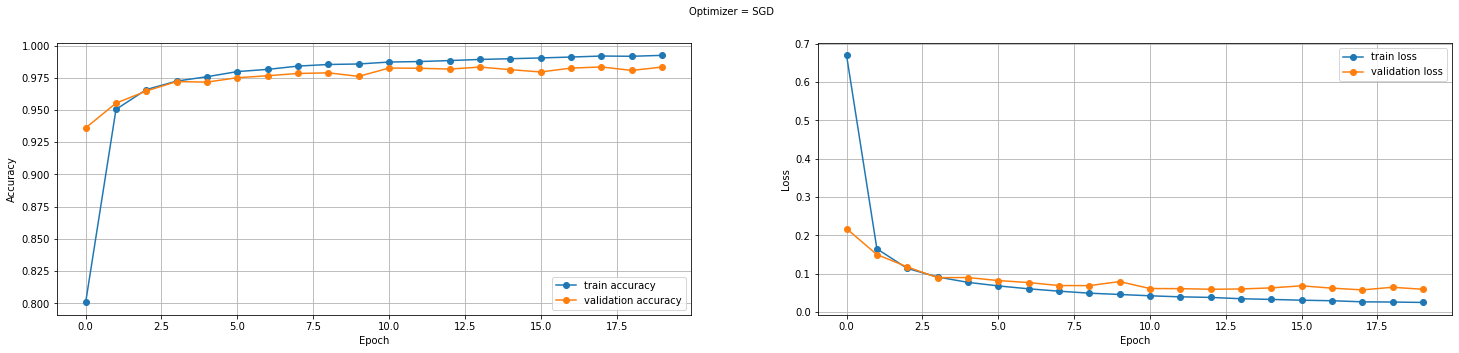

In [23]:
#  training results
plt.figure(figsize=(25,5))
plt.suptitle('Optimizer = SGD', fontsize = 10)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

ADAM

In [24]:
model.compile(
	optimizer = tf.keras.optimizers.Adam(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

In [25]:
# train  model
h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split = 0.4)

Epoch 1/20
1125/1125 [==============================] - 22s 19ms/step - loss: 0.0652 - accuracy: 0.9782 - val_loss: 0.0758 - val_accuracy: 0.9772
Epoch 2/20
1125/1125 [==============================] - 21s 19ms/step - loss: 0.0456 - accuracy: 0.9851 - val_loss: 0.0648 - val_accuracy: 0.9811
Epoch 3/20
1125/1125 [==============================] - 21s 19ms/step - loss: 0.0344 - accuracy: 0.9890 - val_loss: 0.0563 - val_accuracy: 0.9833
Epoch 4/20
1125/1125 [==============================] - 21s 19ms/step - loss: 0.0291 - accuracy: 0.9907 - val_loss: 0.0564 - val_accuracy: 0.9837
Epoch 5/20
1125/1125 [==============================] - 21s 19ms/step - loss: 0.0219 - accuracy: 0.9926 - val_loss: 0.0505 - val_accuracy: 0.9857
Epoch 6/20
1125/1125 [==============================] - 21s 19ms/step - loss: 0.0174 - accuracy: 0.9944 - val_loss: 0.0533 - val_accuracy: 0.9852
Epoch 7/20
1125/1125 [==============================] - 21s 19ms/step - loss: 0.0147 - accuracy: 0.9948 - val_loss: 0.0743 -

In [28]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0558 - accuracy: 0.9886

Test accuracy: 0.9886000156402588


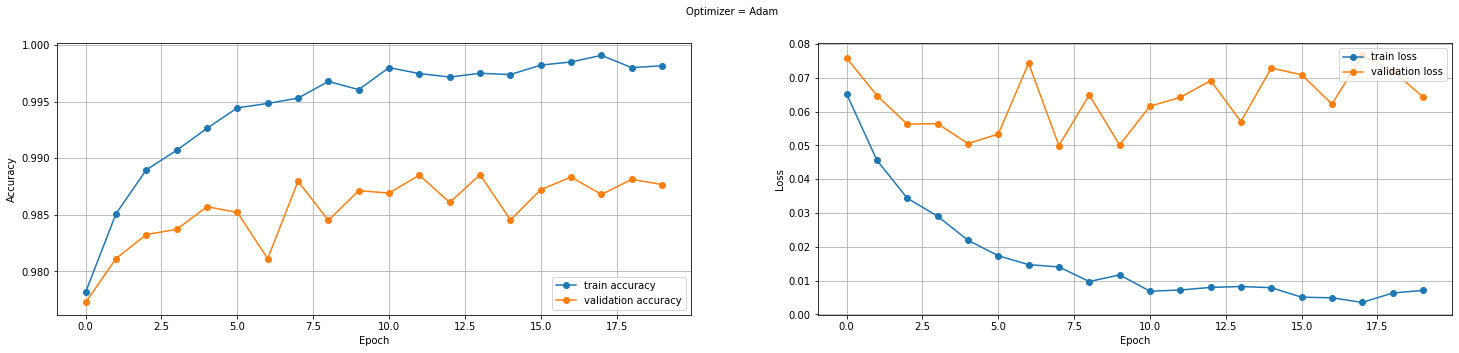

In [29]:
#  training results
plt.figure(figsize=(25,5))
plt.suptitle('Optimizer = Adam', fontsize = 10)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')
plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')
plt.show()

TypeError: ignored

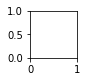

In [49]:
plt.figure(figsize = (20, 6))
for i in range(100):
  plt.subplot(5, 20, i+1)
  plt.imshow(X_train[i], cmap='gray_r')
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(Y_train[i])
plt.show()

RMSprop

In [53]:
model.compile(
	optimizer = tf.keras.optimizers.RMSprop(),
	loss = tf.keras.losses.sparse_categorical_crossentropy,
	metrics = ['accuracy']
)

h = model.fit(x=X_train, y=Y_train, epochs=20, validation_split = 0.4)

Epoch 1/20
1125/1125 [==============================] - 22s 19ms/step - loss: 2.0747e-06 - accuracy: 1.0000 - val_loss: 0.1328 - val_accuracy: 0.9925
Epoch 2/20
1125/1125 [==============================] - 21s 19ms/step - loss: 2.7702e-05 - accuracy: 1.0000 - val_loss: 0.1437 - val_accuracy: 0.9927
Epoch 3/20
1125/1125 [==============================] - 21s 19ms/step - loss: 1.5894e-09 - accuracy: 1.0000 - val_loss: 0.1381 - val_accuracy: 0.9927
Epoch 4/20
1125/1125 [==============================] - 21s 19ms/step - loss: 2.5166e-10 - accuracy: 1.0000 - val_loss: 0.1393 - val_accuracy: 0.9930
Epoch 5/20
1125/1125 [==============================] - 21s 18ms/step - loss: 1.6557e-11 - accuracy: 1.0000 - val_loss: 0.1392 - val_accuracy: 0.9929
Epoch 6/20
1125/1125 [==============================] - 21s 19ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1389 - val_accuracy: 0.9929
Epoch 7/20
1125/1125 [==============================] - 21s 18ms/step - loss: 0.0000e+00 - accuracy:

In [46]:
test_loss, test_accuracy = model.evaluate(X_test, Y_test)
print(f'\nTest accuracy: {test_accuracy}')

313/313 [==============================] - 2s 5ms/step - loss: 0.1039 - accuracy: 0.9921

Test accuracy: 0.9921000003814697


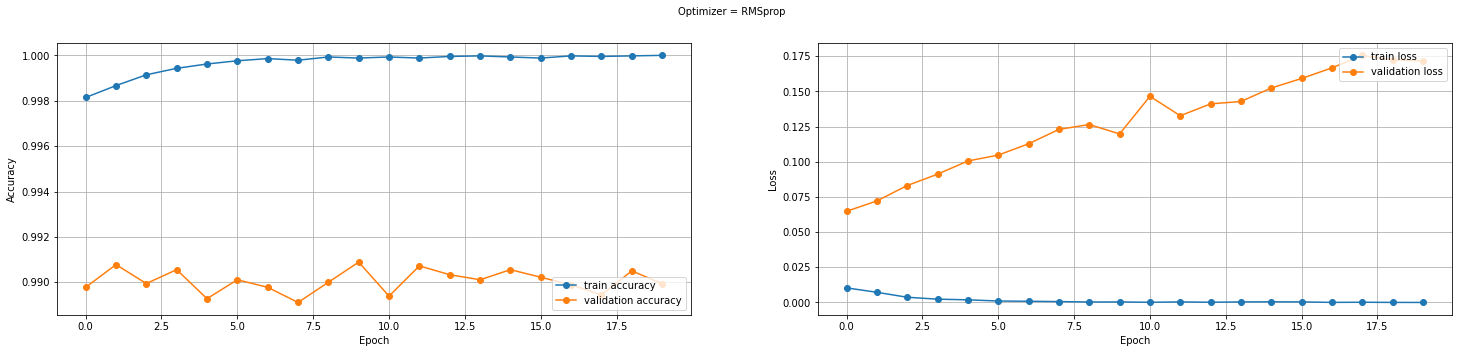

In [48]:
# Plotting the  results
plt.figure(figsize=(25,5))
plt.suptitle('Optimizer = RMSprop', fontsize = 10)
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label = 'train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label = 'train loss')
plt.plot(h.history['val_loss'], 'o-', label = 'validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()